<a href="https://colab.research.google.com/github/littlesock/AI/blob/main/0512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

集群中心的座標: [[2.1 2.1]
 [1.1 1.1]]
預測: [1 1 1 0 0 0]
實測: [1, 1, 1, 0, 0, 0]
預測[1,1],[2.3,2.1]: [1 0]


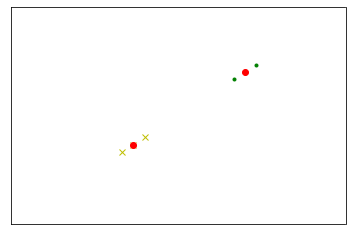

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split  #匯入 K-means 函式庫
from sklearn.cluster import KMeans
from time import time
from sklearn import metrics

X= np.array([[1,1],[1.1,1.1],[1.2,1.2],[2,2],[2.1,2.1],[2.2,2.2]])
y=[1,1,1,0,0,0]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)  #KMeans演算法 指定2類資料
print("集群中心的座標:",kmeans.cluster_centers_)  #取得集群中心的座標
print("預測:",kmeans.predict(X))  #預測
print("實測:",y)  #真實答案
print("預測[1,1],[2.3,2.1]:",kmeans.predict([[1,1],[2.3,2.1]])) #預測資料

plt.axis([0,3,0,3]) #用圖片顯示
plt.plot(X[:3,0], X[:3,1], "yx")  #黃色點
plt.plot(X[3:,0], X[3:,1], "g.") #綠色點
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'ro')  #顯示中心點
plt.xticks(())
plt.yticks(())
plt.show()

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

#取得鳶尾花的資料
iris = datasets.load_iris()

#拆分資料 80:20，訓練與測試用2類標籤答案
iris_X_train , iris_X_test , iris_y_train , iris_y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

#KMeans 演算法2類標籤答案
kmeans = KMeans(n_clusters=3)
kmeans_fit = kmeans.fit(iris_X_train) #訓練，沒有標籤答案

print("實際",iris_y_train)  #顯示標籤答案
print("預測",kmeans_fit.labels_)  #顯示預測答案
#調找標籤的數字
iris_y_train[iris_y_train==1]=11
iris_y_train[iris_y_train==0]=1
iris_y_train[iris_y_train==11]=0
print("調整",iris_y_train)  #顯示調整後的預測

score = metrics.accuracy_score(iris_y_train,kmeans.predict(iris_X_train))
print("準確率:{0:f}".format(score)) #顯示準確率

實際 [2 0 1 1 1 2 0 0 0 1 1 0 1 0 2 1 0 2 1 2 2 2 2 0 0 0 0 1 0 0 0 2 2 1 2 0 2
 1 0 1 2 1 0 2 0 2 2 2 0 2 2 0 1 0 0 2 0 2 0 1 0 0 1 2 2 2 2 2 2 1 2 0 1 1
 2 1 0 0 1 0 1 1 1 2 0 1 0 0 1 1 2 1 1 2 0 0 0 1 1 0 2 1 0 1 0 1 1 1 0 0 1
 2 2 1 2 2 0 2 2 1]
預測 [0 1 0 0 0 2 1 1 1 0 0 1 0 1 2 0 1 0 0 0 0 2 2 1 1 1 1 0 1 1 1 2 2 0 2 1 2
 0 1 0 2 0 1 2 1 0 2 2 1 2 2 1 0 1 1 2 1 2 1 0 1 1 0 0 2 2 0 0 0 0 0 1 0 0
 2 0 1 1 0 1 0 0 0 2 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 2 0 1 0 1 0 0 0 1 1 0
 2 2 0 2 2 1 2 2 0]
調整 [2 1 0 0 0 2 1 1 1 0 0 1 0 1 2 0 1 2 0 2 2 2 2 1 1 1 1 0 1 1 1 2 2 0 2 1 2
 0 1 0 2 0 1 2 1 2 2 2 1 2 2 1 0 1 1 2 1 2 1 0 1 1 0 2 2 2 2 2 2 0 2 1 0 0
 2 0 1 1 0 1 0 0 0 2 1 0 1 1 0 0 2 0 0 2 1 1 1 0 0 1 2 0 1 0 1 0 0 0 1 1 0
 2 2 0 2 2 1 2 2 0]
準確率:0.900000


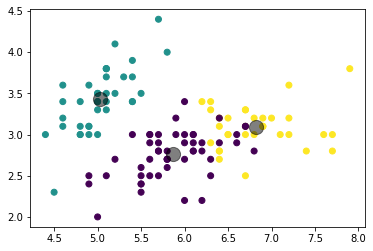

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

# Load the diabetes dataset
iris = datasets.load_iris()

iris_X_train , iris_X_test , iris_y_train , iris_y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

# KMeans 演算法
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_X_train)
y_predict=kmeans.predict(iris_X_train)

x1=iris_X_train[:, 0] # 鳶尾花花萼長度
y1=iris_X_train[:, 1] # 鳶尾花花萼寬度
plt.scatter(x1,y1, c=y_predict, cmap='viridis') # 畫每一筆的位置

centers = kmeans.cluster_centers_ # 每個分類的中心點
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)  #畫出中心點
plt.show()  # 顯示圖片

使用iris dataset 線性規劃 與 KMeans 差異 :
「線性規劃」繪製了所有散點圖到直線的距離。其中散點圖為鳶尾花真實的花萼長度和花萼寬度關係，紅色直線為預測的線性迴歸方程，並不像KMeans是先找出中心點，再繪圖。

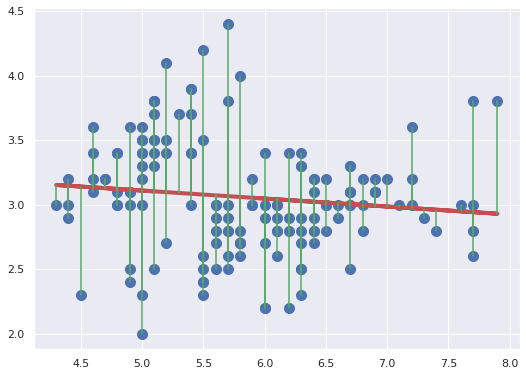

In [40]:
# iris dataset 線性規劃 鳶尾花

from sklearn.datasets import load_iris
hua = load_iris()
#獲取花瓣的長和寬
x = [n[0] for n in hua.data]
y = [n[1] for n in hua.data]
import numpy as np #轉換成陣列
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
#第三步 畫圖
import matplotlib.pyplot as plt
plt.scatter(x,y,s=100)
plt.plot(x,pre,"r-",linewidth=4)
for idx, m in enumerate(x):
  plt.plot([m,m],[y[idx],pre[idx]], 'g-')
plt.show()

(0.5, 7.390000000000006, -0.4, 2.9900000000000033)

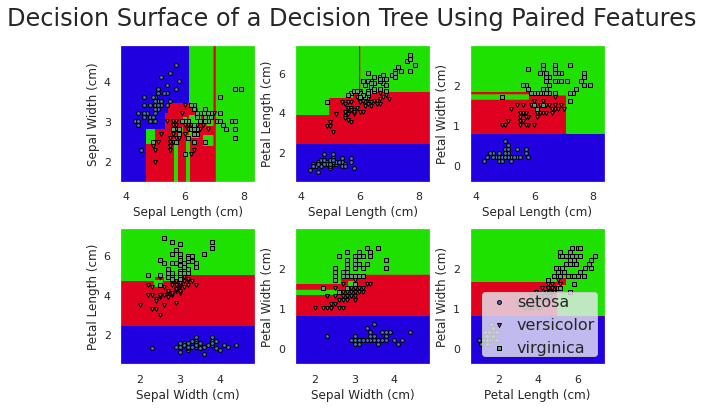

In [33]:
#iris dataset decision tree

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import the needed matplotlib functionality for scatter plot visualization.
import matplotlib.pyplot as plt
# import the needed dataset.
from sklearn.datasets import load_iris
# Import the model and an additional visualization tool.
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Define a variable to establish three classes/species.
class_count = 3
# Define standard RGB color scheme for visualizing ternary classification in order to match the color map used later.
plot_colors = 'brg'
# Define marker options for plotting class assignments of training data.
markers = 'ovs'
# We also need to establish a resolution for plotting.  I favor clean powers of ten, but this is not by any means a hard and fast rule.
plot_res = 0.01

iris = load_iris()

models = []

# Use enumerate() to define the possible pairs of features available and iterate over each pair.
for pair_index, pair in enumerate([[0, 1], [0, 2], [0, 3], 
                                           [1, 2], [1, 3], 
                                                   [2, 3] ]):

    # We only take the two features corresponding to the pair in question...
    X, y = iris.data[:, pair] , iris.target
    
    # ... to fit the decision tree classifier model.
    model = DecisionTreeClassifier().fit(X, y)
    
    # Append the results to the models list
    models.append(model)
    
    # Establish a two row by three column subplot array for plotting.
    plt.subplot(2, 3, pair_index + 1)
    
    # Define appropriate x and y ranges for each plot...
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # ... and use each range to define a meshgrid to use as the plotting area.
    xx, yy = np.meshgrid(np.arange(x_min, 
                                   x_max, 
                                   plot_res),
                         np.arange(y_min, 
                                   y_max, 
                                   plot_res) )
    # Use plt.tight_layout() to establish spacing of the subplots.
    plt.tight_layout(h_pad = 0.5, 
                     w_pad = 0.5, 
                       pad = 4.0 )
    
    # Predict the classification of each point in the meshgrid based on the calculated model above.
    # The numpy methods .c_() and .ravel() reshape our meshgrid values into a format compatible with our model.predict() method,
    Z = model.predict(np.c_[xx.ravel(), 
                            yy.ravel() ])
    # Reshape the predictions to match xx...
    Z = Z.reshape(xx.shape)
    # ... and prepare a contour plot that reflects the predictions .
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)
    
    # Define the subplot axis labels after title casing while preserving case on the unit of measure 
    plt.xlabel(iris.feature_names[pair[0]].title()[0:-4] + iris.feature_names[pair[0]][-4:])
    plt.ylabel(iris.feature_names[pair[1]].title()[0:-4] + iris.feature_names[pair[1]][-4:])
    
    # Plot the training points for each species in turn
    for i, color, marker in zip(range(class_count), plot_colors, markers):
        # Subset the data to the class in question with the np.where() method
        index = np.where(y == i)
        # Plot the class in question on the subplot
        plt.scatter(X[index, 0], 
                    X[index, 1], 
                    c = color,
                    marker = marker,
                    label = iris.target_names[i],
                    cmap = plt.cm.brg, 
                    edgecolor = 'black', 
                    s = 15                       )

# Define a title for the overall collection of subplots after each subplot is fully defined
plt.suptitle('Decision Surface of a Decision Tree Using Paired Features',
             size = 24                                                   )

# Define the legend for the subplot collection
plt.legend(loc = 'lower right',
           fontsize = 16,
           borderpad = 0.1, 
           handletextpad = 0.1 )

# Set limits just large enough to show everything cleanly
plt.axis("tight")
